# class Dataset
Вам необходимо знать, как писать собственный класс Dataset, ниже показано, как написать простейший его вариант.


In [ ]:
from PIL import Image
from torchvision import transforms
from IPython.display import clear_output
import os
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_transforms = transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation((-30,30)),
        transforms.RandomGrayscale(p=0.3),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, path_data, transforms):
        self.path_data = path_data
        self.image_paths = os.listdir(self.path_data)
        self.transforms = transforms


    def __len__(self):
        return len(self.image_paths)


    def __getitem__(self, idx):
        image = Image.open(os.path.join(self.path_data, self.image_paths[idx]))
        image = self.transforms(image)
        return torch.FloatTensor(image)

train_data = Dataset('/content/cats', transforms=data_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=2, shuffle=True)

In [ ]:
imgs = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


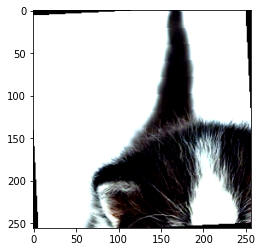

In [ ]:
imshow(imgs[0])

В таком виде даталоадер можно использовать для тренировки модели

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


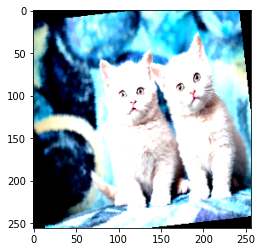

In [ ]:
import time
epoch_counts = 5
for epoch in range(epoch_counts):
    for img in train_loader:
        imshow(img[0])
        time.sleep(2)
        clear_output(True)


# Задание

Вам необходимо написать класс Dataset, который возвращает пары (изображение, его категория). Изображения нужно использовать из папки cats, которую мы использовали до этого, а категории нужно взять из csv файла. В csv файле две колонки, filename - имя изображения и category - его категория.

In [ ]:
test_transforms = transforms.Compose([
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])

In [ ]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, image_folder_path, category_path, transforms):
        ### PUT YOUR CODE HERE ###


    def __len__(self):
        return len(### PUT YOUR CODE HERE ###)


    def __getitem__(self, idx):
        ### PUT YOUR CODE HERE ###
        return (torch.FloatTensor(image), torch.tensor(category))


train_data = Dataset('/content/cats', 'cats_categories.csv', transforms=test_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=5, shuffle=True)

In [ ]:
imgs, cats = next(iter(train_loader))

In [ ]:
def test(imgs, cats):
    image3 = Image.open('/content/cats/3.jpeg')
    image3 = test_transforms(image3)
    image1 = Image.open('/content/cats/1.jpeg')
    image1 = test_transforms(image1)
    assert imgs.size() == torch.Size([5, 3, 256, 256])
    assert (list(set(cats.numpy())) == np.array([0,1,2,3,4])).all()
    assert np.isclose(imgs[np.where(cats.numpy() == 0)[0][0]].numpy(), image3.numpy()).all()
    assert np.isclose(imgs[np.where(cats.numpy() == 4)[0][0]].numpy(), image1.numpy()).all()
    print('Успешно')



In [ ]:
test(imgs, cats)

Задание считается выполненным, когда у вас прошел тест. Удачи:)